In [9]:
import requests
from io import StringIO

In [10]:
import pandas as pd

In [11]:
# Show all columns when printing a DataFrame
pd.set_option("display.max_columns", None)

In [12]:
# Show wider text so columns don't wrap
pd.set_option("display.width", None)

In [13]:
url_2022 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2022&loan_purpose=1"
url_2023 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2023&loan_purpose=1"
url_2024 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2024&loan_purpose=1"

In [14]:
headers = {
    "User-Agent": "Mozilla/5.0"
}

In [15]:
response_2022 = requests.get(url_2022, headers=headers)
data_2022 = pd.read_csv(StringIO(response_2022.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_52401/1305237543.py:2: DtypeWarning: Columns (3,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022 = pd.read_csv(StringIO(response_2022.text))


In [16]:
response_2023 = requests.get(url_2023, headers=headers)
data_2023 = pd.read_csv(StringIO(response_2023.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_52401/2608906927.py:2: DtypeWarning: Columns (5,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2023 = pd.read_csv(StringIO(response_2023.text))


In [ ]:
response_2024 = requests.get(url_2024, headers=headers)
data_2024 = pd.read_csv(StringIO(response_2024.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_52401/1557109215.py:2: DtypeWarning: Columns (5,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2024 = pd.read_csv(StringIO(response_2024.text))


In [ ]:
print(data_2022.shape)
print(data_2023.shape)
print(data_2024.shape)

(16099307, 99)
(11564178, 99)
(12229298, 99)


In [11]:
if data_2022.columns.equals(data_2023.columns) and data_2022.columns.equals(data_2024.columns):
    print("Columns match across all years.")
else:
    print("Column mismatch detected!")

Columns match across all years.


In [12]:
data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

In [13]:
data.shape

(39892783, 99)

In [14]:
data["action_taken"].value_counts()

action_taken
1    20292801
3     6637271
4     5229282
6     4095421
5     1909630
2     1088580
8      457899
7      181899
Name: count, dtype: int64

**Values:**
- 1: Loan originated
- 2: Application approved but not accepted
- 3: Application denied
- 4: Application withdrawn by applicant
- 5: File closed for incompleteness
- 6: Purchased loan
- 7: Preapproval request denied
- 8: Preapproval request approved but not accepted

**Values will be grouped as:**
- 1,2,8: Approved
- 3,7: Denied

**Values to be removed:**
- 4, 5, 6

<Axes: xlabel='action_taken'>

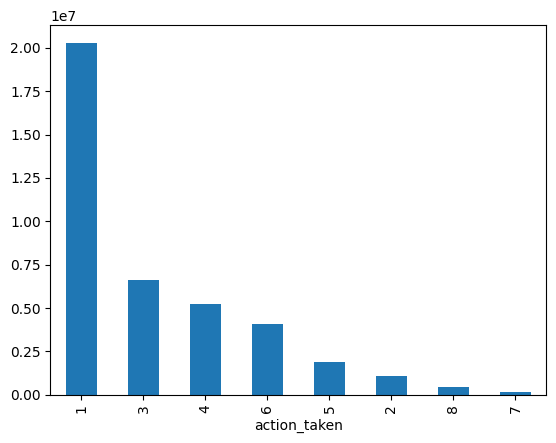

In [15]:
data['action_taken'].value_counts().plot(kind='bar')

In [46]:
data['loan_purpose'].value_counts()

loan_purpose
1     21033865
32     6526426
31     4228661
4      4014477
2      3941155
5       148199
Name: count, dtype: int64

In [16]:
approved_data = data[(data['action_taken'] == 1) | (data['action_taken'] == 2) | (data['action_taken'] == 8)]
denied_data = data[(data['action_taken'] == 3) | (data['action_taken'] == 7)]

In [17]:
print(approved_data.shape)
print(denied_data.shape)

(21839280, 99)
(6819170, 99)


In [18]:
#verify row count
print(data[data['action_taken'] == 1].shape[0] + data[data['action_taken'] == 2].shape[0] + data[data['action_taken'] == 8].shape[0])
print(data[data['action_taken'] == 3].shape[0] + data[data['action_taken'] == 7].shape[0])

21839280
6819170


In [19]:
df = pd.concat([approved_data, denied_data], ignore_index=True)

In [20]:
df.shape

(28658450, 99)

In [21]:
# verify
print(approved_data.shape[0] + denied_data.shape[0])

28658450


In [22]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,254900ACUWEGW702BR80,35614,NY,36061.0,36061016002.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3607,36.57,99000,152.12,440,55,0
1,2022,254900ACUWEGW702BR80,35614,NY,36005.0,36005043400.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3649,95.09,99000,102.35,550,879,77
2,2022,254900ACUWEGW702BR80,35614,NY,36081.0,36081071100.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5687,55.57,99000,132.73,1769,597,65
3,2022,254900ACUWEGW702BR80,35614,NY,36047.0,36047058400.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3797,32.76,99000,87.91,443,610,59
4,2022,254900ACUWEGW702BR80,22744,FL,12011.0,12011090502.0,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7056,33.80,82100,128.85,1914,2062,42


In [23]:
# Amout of rows removed because of application incompleteness, withdrawal, or other reasons
row_removed = data.shape[0] - df.shape[0]
print(f"Rows removed: {row_removed:,}")

Rows removed: 11,234,333


In [25]:
df.to_csv('../Step 2/df_trimmed.csv', index=False)